In [100]:
#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pandas as pd
from tqdm import tqdm
import statsmodels.api as sm
# import tqdm pandas
tqdm.pandas()

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

In [63]:
video_data = pd.read_csv('data/yt_tech_channels_metadata.tsv', sep='\t')
channel_data = pd.read_csv('data/tech_review_channels.tsv', sep='\t')

In [64]:
channel_data

,Unnamed: 0,join_date,channel_id,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,count_tech_videos
0,0,2010-12-21,UCsTcErHg8oDvUnTzoqsYeNw,Unbox Therapy,15300000,1672,206.0,2.0870,406.0
1,1,2015-10-19,UCOhHO2ICt0ti9KAh-QHvttQ,Technical Guruji,13979890,2539,240.0,2.0870,209.0
2,2,2012-05-18,UCe_vXdMrHHseZ_esYUskSBw,CrazyRussianHacker,11200000,1411,444.0,2.0870,105.0
3,3,2005-06-22,UCE_M8A5yxnLfW0KghEeajjw,Apple,9970000,291,489.0,2.0870,64.0
4,4,2008-03-21,UCBJycsmduvYEL83R_U4JriQ,Marques Brownlee,9400000,1148,530.0,2.0870,370.0
...,...,...,...,...,...,...,...,...,...
1245,1245,2012-06-06,UCgMHqEDFll6X962CgXPzh4w,FocusCamera TV,10000,278,940963.0,40.6530,42.0
1246,1246,2018-02-25,UCJjacdkHH7Zxw8ouKQrirUg,The Best Coders,10200,28,941074.0,42.4845,2.0
1247,1247,2016-07-17,UCviAcL8AlEoGqLDWx7t_iPw,Mobile Tag,10300,20,952387.0,53.1435,6.0
1248,1248,2011-02-20,UCncAHfjOv1B_U8esTmLYukQ,Curtis Paradis,10300,97,963290.0,53.1435,11.0


In [86]:
def merge_dfs(video_data, channel_data):
    merged = pd.merge(channel_data, video_data, on='channel_id', how='inner')
    return merged

In [112]:
def get_sentiment(df, start, end):
    # sort df by view_count
    df = df.copy()
    df = df[(df['view_count'] >= start) & (df['view_count'] <= end)]
    df = df.sort_values(by=['view_count', 'subscriber_rank_sb'], ascending=[False, False])
    
    df['sentiment'] = df['title'].progress_apply(lambda x: TextBlob(str(x)).sentiment[0])
    return df

In [113]:
# perform ols regression on sentiment and view_count
def ols(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    print_model = model.summary()
    print(print_model)
    return model

In [114]:
analyzer = SentimentIntensityAnalyzer()

In [115]:
merged_df = merge_dfs(video_data, channel_data)

In [116]:
df1 = get_sentiment(merged_df, 0, 100000)

100%|██████████| 644755/644755 [00:36<00:00, 17669.68it/s]


In [117]:
def write_to_file(df, filename):
    with open('data/'+filename, 'w') as f:
        for index, row in df.iterrows():
            f.write(str(row['title']) + '\t' + str(row['sentiment']) + '\n')

In [118]:
print(merged_df['title'].isna().sum())

4


In [119]:
df1

,Unnamed: 0_x,join_date,channel_id,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,count_tech_videos,Unnamed: 0_y,...,like_count,tags,title,upload_date,view_count,tech_review,num_comms,clean_title,clean_tags,sentiment
300855,295,2007-03-26,UCpvg0uZH-oxmCagOWJo9p9g,Lenovo,197000,1709,87495.0,4.3725,95.0,26028,...,293.0,"lenovo,vision,channel,lenovovision,review,vide...",Lenovo Unboxed: ThinkPad X240,2013-10-24,100000.0,False,105.0,"['lenovo', 'unboxed', 'thinkpad']","['lenovo', 'vision', 'channel', 'lenovovision'...",0.000000
285664,280,2008-12-13,UC_SN80_V2GymyCWM2oTYTeg,OC3D TV,213000,1120,83380.0,4.2925,95.0,229836,...,1439.0,"MSI,GTX,1080 TI,GTX1080TI,TRIO X,GAMING,GAMER,...",MSI GTX 1080 Ti Gaming X Trio Review,2017-10-19,100000.0,True,377.0,"['msi', 'gtx', 'ti', 'gaming', 'trio', 'review']","['msi', 'gtx', 'ti', 'gtx', 'ti', 'trio', 'gam...",0.000000
5661,3,2005-06-22,UCE_M8A5yxnLfW0KghEeajjw,Apple,9970000,291,489.0,2.0870,64.0,534770,...,779.0,"Apple,tyler perry",Apple Music — Carpool Karaoke — Tyler Perry an...,2017-10-03,99999.0,False,0.0,"['apple', 'music', 'carpool', 'karaoke', 'tyle...","['apple', 'tyler', 'perry']",0.000000
582655,802,2016-03-12,UC0IqRM2Mwybj7XV9YPnJn1Q,CJKnowsTECH,31400,252,386084.0,6.7125,55.0,692956,...,1253.0,"Galaxy Watch vs Apple Watch,apple watch vs gal...",Apple Watch Series 4 vs Samsung Galaxy Watch R...,2018-10-06,99998.0,True,699.0,"['apple', 'watch', 'series', 'samsung', 'galax...","['galaxy', 'watch', 'apple', 'watch', 'apple',...",0.200000
375051,419,2012-08-02,UCQN7NhtBqADmNaRA3yc_mAQ,TK Bay,114000,866,136339.0,5.5120,117.0,372341,...,1241.0,"tk bay,tkdsl8655,XDA,Android,iphone 7,iphone 7...",Iphone 7 Review from an Android user point of ...,2016-10-03,99997.0,False,395.0,"['iphone', 'review', 'android', 'user', 'point...","['tk', 'bay', 'tkdsl', 'xda', 'android', 'ipho...",0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499143,624,2014-07-30,UC_g5mRRALRhcH7ENYbmdOPQ,Tech Dad,53200,12851,253274.0,5.5445,3890.0,223546,...,0.0,NaN,Oppo RX17 Neo vs Nokia 6.1 | Which one is Bett...,2018-11-06,0.0,False,0.0,"['oppo', 'rx', 'neo', 'nokia', 'one', 'better'...",[],0.500000
499506,624,2014-07-30,UC_g5mRRALRhcH7ENYbmdOPQ,Tech Dad,53200,12851,253274.0,5.5445,3890.0,223909,...,0.0,"Xiaomi Black Shark Helo vs Oppo R15X,Oppo R15X...",Xiaomi Black Shark Helo vs Oppo R15X | Which o...,2018-10-24,0.0,False,0.0,"['xiaomi', 'black', 'shark', 'helo', 'oppo', '...","['xiaomi', 'black', 'shark', 'helo', 'oppo', '...",0.166667
499903,624,2014-07-30,UC_g5mRRALRhcH7ENYbmdOPQ,Tech Dad,53200,12851,253274.0,5.5445,3890.0,224306,...,0.0,"Google Pixel 3 XL vs Google Pixel XL,Google Pi...",Google Pixel 3 XL vs Google Pixel XL | Which o...,2018-10-13,0.0,False,0.0,"['google', 'pixel', 'xl', 'google', 'pixel', '...","['google', 'pixel', 'xl', 'google', 'pixel', '...",0.500000
501505,624,2014-07-30,UC_g5mRRALRhcH7ENYbmdOPQ,Tech Dad,53200,12851,253274.0,5.5445,3890.0,225908,...,0.0,"Lenovo K9 vs Oppo F7 Youth,Oppo F7 Youth vs Le...",Lenovo K9 vs Oppo F7 Youth | Which one is Bett...,2018-11-13,0.0,False,0.0,"['lenovo', 'oppo', 'youth', 'one', 'better', '...","['lenovo', 'oppo', 'youth', 'oppo', 'youth', '...",0.500000


In [120]:
ols(df1['sentiment'], df1['view_count'])

                            OLS Regression Results                            
Dep. Variable:             view_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     111.3
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           5.11e-26
Time:                        17:45:11   Log-Likelihood:            -7.3515e+06
No. Observations:              644755   AIC:                         1.470e+07
Df Residuals:                  644753   BIC:                         1.470e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.561e+04     29.309    532.437      0.0

In [121]:
write_to_file(df1, 'sentiment_0.txt')

/var/folders/zj/sr110gkn1vz4qf70llfwlh8c0000gn/T/ipykernel_4851/1088557561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['sentiment'])


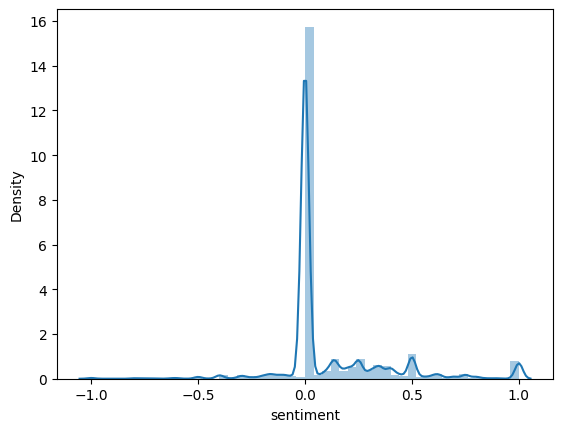

In [122]:
sns.distplot(df1['sentiment'])
plt.show()

In [52]:
video_data = video_data[video_data['tech_review'] == True]

# merge the two dataframes on channel_id
merged_data = pd.merge(video_data, channel_data, on='channel_id')

# sort by view_count decreasing and subscriber_rank_sb decreasing
merged_data.sort_values(by=['view_count', 'subscriber_rank_sb'], ascending=[False, False], inplace=True)

In [55]:
# keep the top 10% of the data
merged_data_kept = merged_data.iloc[:int(len(merged_data)*0.01)]

In [56]:
merged_data_kept

,Unnamed: 0_x,categories,channel_id,dislike_count,display_id,duration,like_count,tags,title,upload_date,...,clean_title,clean_tags,Unnamed: 0_y,join_date,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,count_tech_videos
140825,732758,Science & Technology,UCsTcErHg8oDvUnTzoqsYeNw,39178.0,znK652H6yQM,270,315069.0,"iphone 6 plus bend,iphone 6 bend,iphone 6,ipho...",iPhone 6 Plus Bend Test,2014-09-23,...,"['iphone', 'plus', 'bend', 'test']","['iphone', 'plus', 'bend', 'iphone', 'bend', '...",0,2010-12-21,Unbox Therapy,15300000,1672,206.0,2.0870,406.0
127722,663696,Science & Technology,UC3O8-tKnz9VUn3sxZKyKN3w,11632.0,S0stqHeS1do,30,19875.0,"unbox magic everyday,samsung smart tv video,sa...",Samsung Smart TV or Personal Computer?,2019-05-02,...,"['samsung', 'smart', 'tv', 'personal', 'comput...","['unbox', 'magic', 'everyday', 'samsung', 'sma...",10,2009-06-29,SamsungIndia,4010000,166,2251.0,2.1530,31.0
127707,663603,Science & Technology,UC3O8-tKnz9VUn3sxZKyKN3w,28630.0,vM_1BYMavU0,40,69100.0,"a70,samsung a70s,a70s samsung,samsung galaxy a...",Samsung Galaxy A70s | A50s | A30s – 64MP Tripl...,2019-09-30,...,"['samsung', 'galaxy', 'mp', 'triple', 'camera']","['samsung', 'samsung', 'samsung', 'galaxy', 's...",10,2009-06-29,SamsungIndia,4010000,166,2251.0,2.1530,31.0
97464,513995,Science & Technology,UCGMcVCg3tHKmy9oaUCIw8xw,53311.0,4faRX-V-7yU,40,104273.0,"gaming iphone,apple gaming iphone,apple iphone...",iPhone XR — Battery Life — Game Over — Apple,2019-05-28,...,"['iphone', 'xr', 'battery', 'life', 'game', 'a...","['gaming', 'iphone', 'apple', 'gaming', 'iphon...",9,2016-04-12,Apple India,3770000,119,1947.0,2.0890,23.0
127727,663724,Science & Technology,UC3O8-tKnz9VUn3sxZKyKN3w,23315.0,azbOik3tTMY,30,51490.0,"Galaxy A50,Galaxy A30,Galaxy A10,Galaxy A Seri...",Samsung Galaxy A: Triple Camera for 123° Ultra...,2019-03-15,...,"['samsung', 'galaxy', 'triple', 'camera', 'ult...","['galaxy', 'galaxy', 'galaxy', 'galaxy', 'seri...",10,2009-06-29,SamsungIndia,4010000,166,2251.0,2.1530,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47670,248474,Science & Technology,UCXuqSBlHAE6Xw-yeJA0Tunw,1794.0,g-OODE8b_X4,848,41377.0,"gaming,tv,bfgd,big fortmat gaming display,120h...",Setting up NVIDIA's UNRELEASED Gaming TV,2019-02-24,...,"['setting', 'nvidia', 'unreleased', 'gaming', ...","['gaming', 'tv', 'bfgd', 'big', 'fortmat', 'ga...",5,2008-11-25,Linus Tech Tips,9160000,4700,558.0,2.0870,1849.0
48029,250364,Science & Technology,UCXuqSBlHAE6Xw-yeJA0Tunw,798.0,7c3QIENF2vA,598,20061.0,"logitech,g910,review,unboxing,keyboard,mechani...",Logitech G910 Gaming Mechanical Keyboard - Rom...,2014-12-10,...,"['logitech', 'gaming', 'mechanical', 'keyboard...","['logitech', 'review', 'unboxing', 'keyboard',...",5,2008-11-25,Linus Tech Tips,9160000,4700,558.0,2.0870,1849.0
47752,248926,Science & Technology,UCXuqSBlHAE6Xw-yeJA0Tunw,1955.0,agAY_MuwsQ4,459,56611.0,"lg,wallpaper,tv,w7,install,update,window,pc,di...",LG Wallpaper TV Window Project COMPLETE – Linu...,2018-02-08,...,"['lg', 'wallpaper', 'tv', 'window', 'project',...","['lg', 'wallpaper', 'tv', 'install', 'update',...",5,2008-11-25,Linus Tech Tips,9160000,4700,558.0,2.0870,1849.0
6331,34941,Science & Technology,UCpT9kL2Eba91BB9CK6wJ4Pg,889.0,Cumo08eViHk,578,18286.0,All New HTC One (M8) vs HTC One (M7) - Full Co...,All New HTC One (M8) vs HTC One (M7) - Full Co...,2014-03-24,...,"['new', 'htc', 'one', 'htc', 'one', 'full', 'c...","['new', 'htc', 'one', 'htc', 'one', 'full', 'c...",13,2010-12-29,TechSmartt,3570000,1064,2662.0,2.2225,228.0


In [58]:
analyzer = SentimentIntensityAnalyzer()
merged_data_kept['sentiment'] = merged_data_kept['title'].progress_apply(lambda x: analyzer.polarity_scores(x)['compound'])

100%|██████████| 1426/1426 [00:00<00:00, 48831.90it/s]
/var/folders/zj/sr110gkn1vz4qf70llfwlh8c0000gn/T/ipykernel_4851/2690431870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_kept['sentiment'] = merged_data_kept['title'].progress_apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [59]:
import statsmodels.api as sm

# perform ols regression on sentiment and view_count
X = merged_data_kept['sentiment']
X = sm.add_constant(X)
y = merged_data_kept['view_count']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:             view_count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.185
Date:                Thu, 14 Dec 2023   Prob (F-statistic):              0.277
Time:                        17:12:49   Log-Likelihood:                -24038.
No. Observations:                1426   AIC:                         4.808e+04
Df Residuals:                    1424   BIC:                         4.809e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.108e+06   1.35e+05     30.467      0.0

In [27]:
video_data

,Unnamed: 0,categories,channel_id,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,tech_review,num_comms,clean_title,clean_tags
732758,732758,Science & Technology,UCsTcErHg8oDvUnTzoqsYeNw,39178.0,znK652H6yQM,270,315069.0,"iphone 6 plus bend,iphone 6 bend,iphone 6,ipho...",iPhone 6 Plus Bend Test,2014-09-23,72190104.0,True,13636.0,"['iphone', 'plus', 'bend', 'test']","['iphone', 'plus', 'bend', 'iphone', 'bend', '..."
663696,663696,Science & Technology,UC3O8-tKnz9VUn3sxZKyKN3w,11632.0,S0stqHeS1do,30,19875.0,"unbox magic everyday,samsung smart tv video,sa...",Samsung Smart TV or Personal Computer?,2019-05-02,50574915.0,True,573.0,"['samsung', 'smart', 'tv', 'personal', 'comput...","['unbox', 'magic', 'everyday', 'samsung', 'sma..."
663603,663603,Science & Technology,UC3O8-tKnz9VUn3sxZKyKN3w,28630.0,vM_1BYMavU0,40,69100.0,"a70,samsung a70s,a70s samsung,samsung galaxy a...",Samsung Galaxy A70s | A50s | A30s – 64MP Tripl...,2019-09-30,47306127.0,True,2632.0,"['samsung', 'galaxy', 'mp', 'triple', 'camera']","['samsung', 'samsung', 'samsung', 'galaxy', 's..."
513995,513995,Science & Technology,UCGMcVCg3tHKmy9oaUCIw8xw,53311.0,4faRX-V-7yU,40,104273.0,"gaming iphone,apple gaming iphone,apple iphone...",iPhone XR — Battery Life — Game Over — Apple,2019-05-28,46098318.0,True,0.0,"['iphone', 'xr', 'battery', 'life', 'game', 'a...","['gaming', 'iphone', 'apple', 'gaming', 'iphon..."
663724,663724,Science & Technology,UC3O8-tKnz9VUn3sxZKyKN3w,23315.0,azbOik3tTMY,30,51490.0,"Galaxy A50,Galaxy A30,Galaxy A10,Galaxy A Seri...",Samsung Galaxy A: Triple Camera for 123° Ultra...,2019-03-15,45808488.0,True,1639.0,"['samsung', 'galaxy', 'triple', 'camera', 'ult...","['galaxy', 'galaxy', 'galaxy', 'galaxy', 'seri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224263,224263,Science & Technology,UC_g5mRRALRhcH7ENYbmdOPQ,0.0,zLlUVx0y_2k,609,0.0,NaN,Samsung Galaxy A9 2018 vs Nokia 6.1 | Which on...,2018-10-13,1.0,True,0.0,"['samsung', 'galaxy', 'nokia', 'one', 'better'...",[]
224357,224357,Science & Technology,UC_g5mRRALRhcH7ENYbmdOPQ,0.0,Ld80kfHHgv4,609,0.0,"Google Pixel 3 vs Google Pixel,Google Pixel vs...",Google Pixel 3 vs Google Pixel | Which one is ...,2018-10-10,1.0,True,0.0,"['google', 'pixel', 'google', 'pixel', 'one', ...","['google', 'pixel', 'google', 'pixel', 'google..."
222992,222992,Science & Technology,UC_g5mRRALRhcH7ENYbmdOPQ,0.0,PfY0hWE5Hiw,609,0.0,"Lenovo Z5s vs LG Q8,LG Q8 vs Lenovo Z5s,Q8 vs ...",Lenovo Z5s vs LG Q8 | Which one is Better? | C...,2018-12-26,1.0,True,0.0,"['lenovo', 'lg', 'one', 'better', 'comparison']","['lenovo', 'lg', 'lg', 'lenovo', 'lg', 'lenovo..."
223416,223416,Science & Technology,UC_g5mRRALRhcH7ENYbmdOPQ,0.0,tQn0tkj-1u0,620,0.0,"Samsung Galaxy A8s vs Huawei honor 9N,Huawei h...",Samsung Galaxy A8s vs Huawei Honor 9N | Which ...,2018-12-12,1.0,True,0.0,"['samsung', 'galaxy', 'huawei', 'honor', 'one'...","['samsung', 'galaxy', 'huawei', 'honor', 'huaw..."


In [41]:
# sort by view_count
video_data.sort_values('view_count', ascending=False, inplace=True)
# keep only top 10%
video_data_kept = video_data.head(int(len(video_data)*0.01))

In [42]:
video_data_kept

,Unnamed: 0,categories,channel_id,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,tech_review,num_comms,clean_title,clean_tags
732758,732758,Science & Technology,UCsTcErHg8oDvUnTzoqsYeNw,39178.0,znK652H6yQM,270,315069.0,"iphone 6 plus bend,iphone 6 bend,iphone 6,ipho...",iPhone 6 Plus Bend Test,2014-09-23,72190104.0,True,13636.0,"['iphone', 'plus', 'bend', 'test']","['iphone', 'plus', 'bend', 'iphone', 'bend', '..."
663696,663696,Science & Technology,UC3O8-tKnz9VUn3sxZKyKN3w,11632.0,S0stqHeS1do,30,19875.0,"unbox magic everyday,samsung smart tv video,sa...",Samsung Smart TV or Personal Computer?,2019-05-02,50574915.0,True,573.0,"['samsung', 'smart', 'tv', 'personal', 'comput...","['unbox', 'magic', 'everyday', 'samsung', 'sma..."
663603,663603,Science & Technology,UC3O8-tKnz9VUn3sxZKyKN3w,28630.0,vM_1BYMavU0,40,69100.0,"a70,samsung a70s,a70s samsung,samsung galaxy a...",Samsung Galaxy A70s | A50s | A30s – 64MP Tripl...,2019-09-30,47306127.0,True,2632.0,"['samsung', 'galaxy', 'mp', 'triple', 'camera']","['samsung', 'samsung', 'samsung', 'galaxy', 's..."
513995,513995,Science & Technology,UCGMcVCg3tHKmy9oaUCIw8xw,53311.0,4faRX-V-7yU,40,104273.0,"gaming iphone,apple gaming iphone,apple iphone...",iPhone XR — Battery Life — Game Over — Apple,2019-05-28,46098318.0,True,0.0,"['iphone', 'xr', 'battery', 'life', 'game', 'a...","['gaming', 'iphone', 'apple', 'gaming', 'iphon..."
663724,663724,Science & Technology,UC3O8-tKnz9VUn3sxZKyKN3w,23315.0,azbOik3tTMY,30,51490.0,"Galaxy A50,Galaxy A30,Galaxy A10,Galaxy A Seri...",Samsung Galaxy A: Triple Camera for 123° Ultra...,2019-03-15,45808488.0,True,1639.0,"['samsung', 'galaxy', 'triple', 'camera', 'ult...","['galaxy', 'galaxy', 'galaxy', 'galaxy', 'seri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248474,248474,Science & Technology,UCXuqSBlHAE6Xw-yeJA0Tunw,1794.0,g-OODE8b_X4,848,41377.0,"gaming,tv,bfgd,big fortmat gaming display,120h...",Setting up NVIDIA's UNRELEASED Gaming TV,2019-02-24,1653057.0,True,3879.0,"['setting', 'nvidia', 'unreleased', 'gaming', ...","['gaming', 'tv', 'bfgd', 'big', 'fortmat', 'ga..."
250364,250364,Science & Technology,UCXuqSBlHAE6Xw-yeJA0Tunw,798.0,7c3QIENF2vA,598,20061.0,"logitech,g910,review,unboxing,keyboard,mechani...",Logitech G910 Gaming Mechanical Keyboard - Rom...,2014-12-10,1652176.0,True,2139.0,"['logitech', 'gaming', 'mechanical', 'keyboard...","['logitech', 'review', 'unboxing', 'keyboard',..."
248926,248926,Science & Technology,UCXuqSBlHAE6Xw-yeJA0Tunw,1955.0,agAY_MuwsQ4,459,56611.0,"lg,wallpaper,tv,w7,install,update,window,pc,di...",LG Wallpaper TV Window Project COMPLETE – Linu...,2018-02-08,1650724.0,True,3777.0,"['lg', 'wallpaper', 'tv', 'window', 'project',...","['lg', 'wallpaper', 'tv', 'install', 'update',..."
34941,34941,Science & Technology,UCpT9kL2Eba91BB9CK6wJ4Pg,889.0,Cumo08eViHk,578,18286.0,All New HTC One (M8) vs HTC One (M7) - Full Co...,All New HTC One (M8) vs HTC One (M7) - Full Co...,2014-03-24,1649248.0,True,7287.0,"['new', 'htc', 'one', 'htc', 'one', 'full', 'c...","['new', 'htc', 'one', 'htc', 'one', 'full', 'c..."


In [43]:
# perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()
video_data_kept['sentiment'] = video_data_kept['title'].progress_apply(lambda x: analyzer.polarity_scores(x)['compound'])

100%|██████████| 1426/1426 [00:00<00:00, 53270.73it/s]
/var/folders/zj/sr110gkn1vz4qf70llfwlh8c0000gn/T/ipykernel_4851/969379811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_data_kept['sentiment'] = video_data_kept['title'].progress_apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [44]:
print(analyzer.polarity_scores('HUAWEI Mate20 Pro | A HIGHER INTELLIGENCE'))
print(analyzer.polarity_scores('HUAWEI Mate20 Pro | A HIGHER INTELLIGENCE'.lower()))

{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.5904}
{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.4767}


In [45]:
import statsmodels.api as sm

# perform ols regression on sentiment and view_count
X = video_data_kept['sentiment']
X = sm.add_constant(X)
y = video_data_kept['view_count']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:             view_count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.185
Date:                Thu, 14 Dec 2023   Prob (F-statistic):              0.277
Time:                        17:00:31   Log-Likelihood:                -24038.
No. Observations:                1426   AIC:                         4.808e+04
Df Residuals:                    1424   BIC:                         4.809e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.108e+06   1.35e+05     30.467      0.0

/var/folders/zj/sr110gkn1vz4qf70llfwlh8c0000gn/T/ipykernel_4851/842479006.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(video_data_kept['sentiment'])


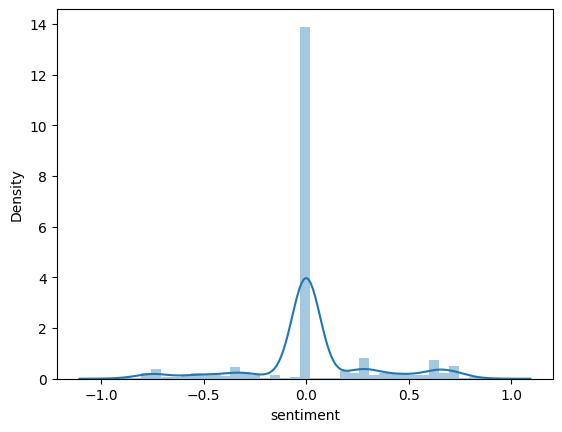

In [46]:
# plot distribution of sentiment
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(video_data_kept['sentiment'])
plt.show()


In [47]:
# write the title and the sentiment to a txt file


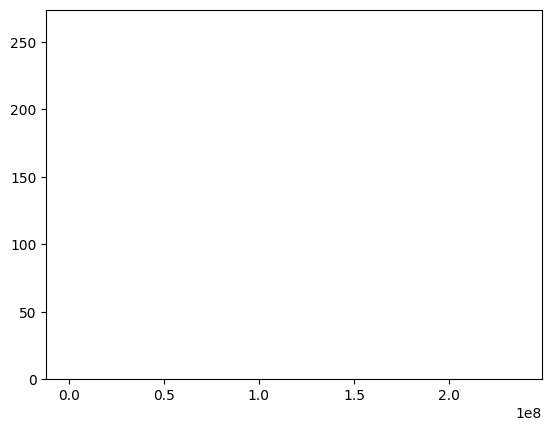

In [8]:
# get a dictionary of each viewcount and its number of occurrences
viewcount_dict = video_data['view_count'].value_counts().to_dict()

# sort the dictionary by value in descending order
viewcount_dict = {k: v for k, v in sorted(viewcount_dict.items(), key=lambda item: item[0], reverse=True)}

# plot the viewcount distribution of the top 10% most viewed videos
import matplotlib.pyplot as plt
plt.bar(list(viewcount_dict.keys())[:int(len(viewcount_dict))], list(viewcount_dict.values())[:int(len(viewcount_dict))])
plt.show()


In [5]:
# plot the number of occurence of each view in view_count
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x="view_count", data=video_data)



KeyboardInterrupt: 

In [ ]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(example)

In [5]:
vs

{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.8225}